In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, callbacks
import tensorflow as tf
import numpy as np
import signalnet as sn
import pandas as pd

2023-04-28 22:15:00.549997: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("data/testsetallwaves_sr22050.csv")
df = df.loc[:80000,:]

In [3]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up_same(X_train, X_test, y_train, y_test)

9
(39991, 9)


In [5]:
# y_train_update = []

# for i in y_train:
#     y_train_update.append(i[-1])

# y_train = np.array(y_train_update)

# y_test_update = []

# for i in y_test:
#     y_test_update.append(i[-1])

# y_test = np.array(y_test_update)

In [6]:
X_train.shape

(39991, 9)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [8]:
model = keras.Sequential()

2023-04-28 22:15:03.635576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:03.640445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:03.641086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:03.642995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:03.643391: I tensorflow/compile

In [9]:
model.add(layers.LSTM(15,input_shape=(1,10)))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.compile(loss="mean_squared_error",optimizer ="adam", metrics=["mean_absolute_percentage_error", "cosine_proximity"], )


2023-04-28 22:15:05.022235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 22:15:05.024571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 22:15:05.026929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15)                1560      
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,898
Trainable params: 4,898
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train,y_train,epochs=50,batch_size=5,validation_split=0.05, callbacks=[callbacks.EarlyStopping(monitor="loss")])

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1, 10), found shape=(None, 1, 9)


In [ ]:
predictions = model.predict(X_test)

  15/1250 [..............................] - ETA: 4s  

2023-04-28 22:07:31.188845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 22:07:31.191253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 22:07:31.192327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1250/1250 [==============================] - 4s 3ms/step


In [ ]:
predictions.shape

(39992, 10)

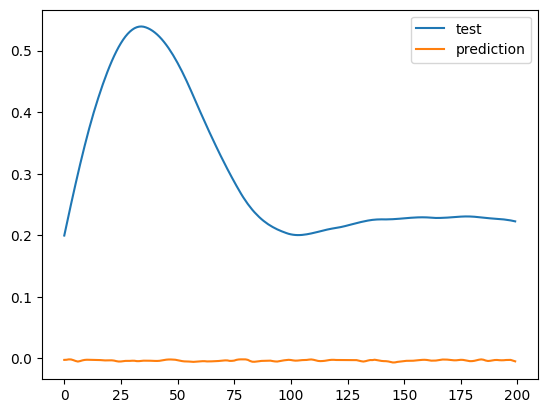

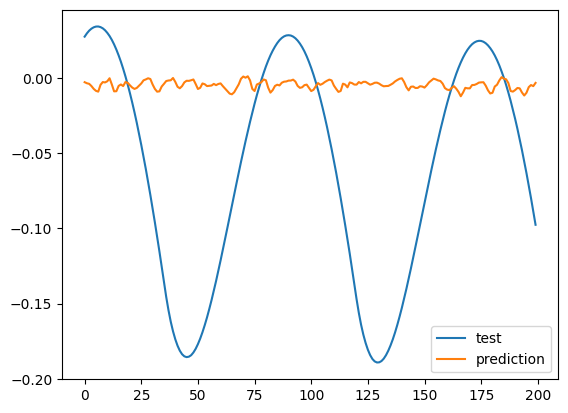

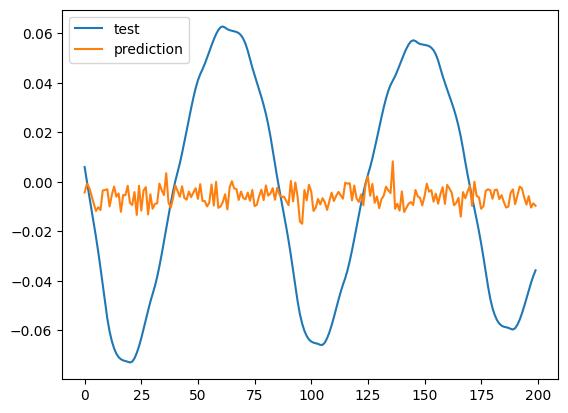

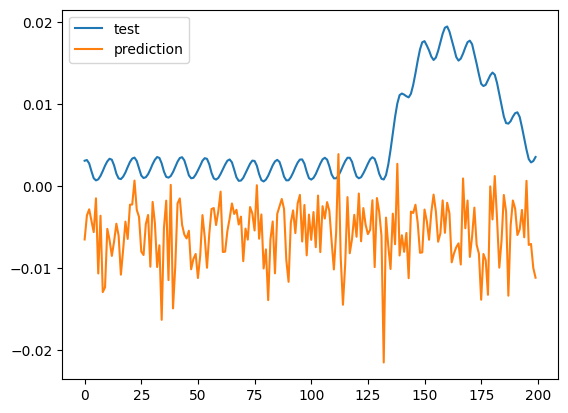

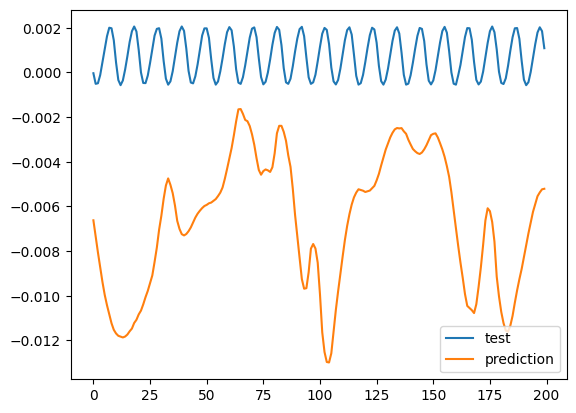

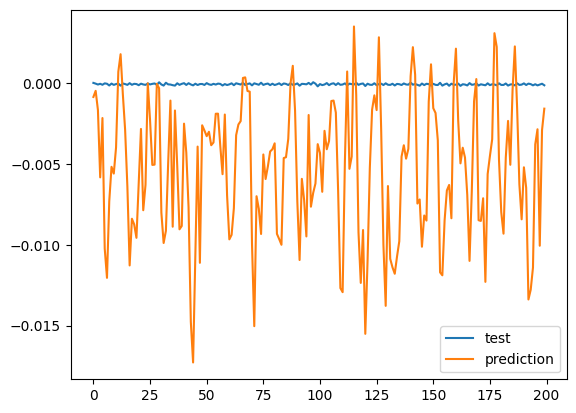

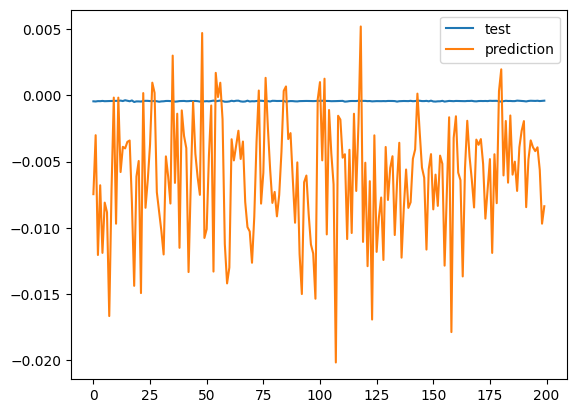

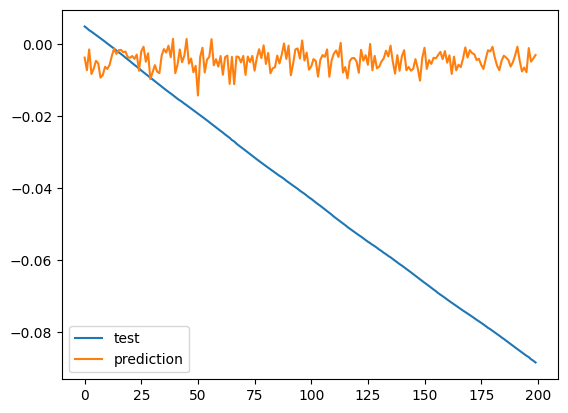

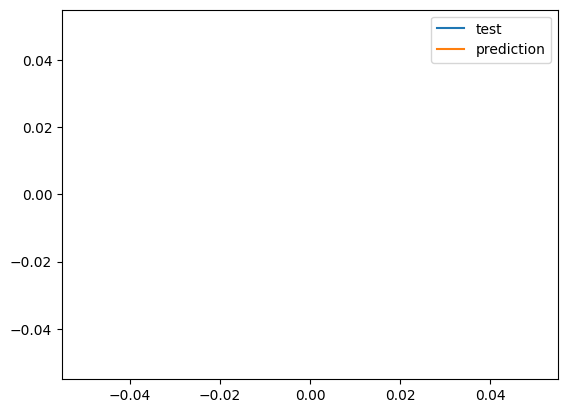

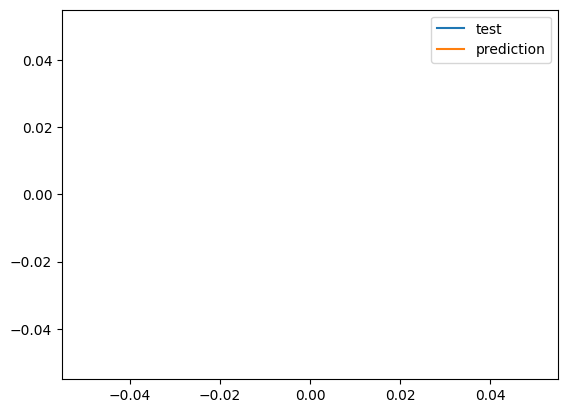

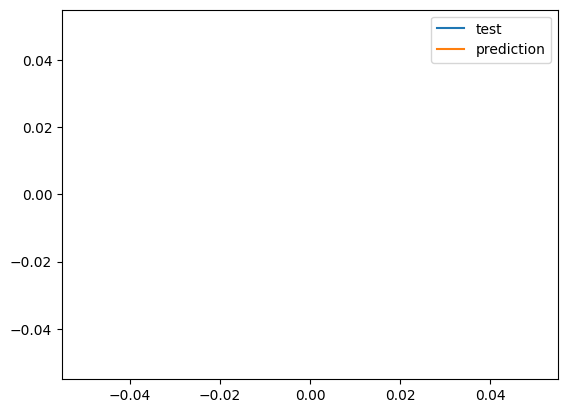

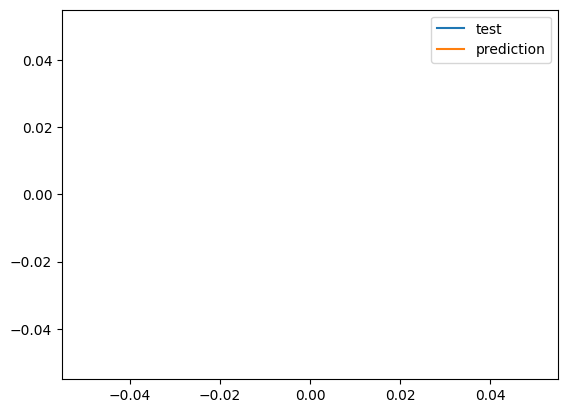

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, 60000, 5000):
    plt.plot(y_test[i:i+200, -1], label="test")
    plt.plot(predictions[i:i+200,-1], label="prediction")
    plt.legend()
    plt.show()
    plt.clf()

# for i in range(0, 60000, 5000):
#     plt.plot(y_train[i:i+200], label="test")
#     plt.legend()
#     plt.show()
#     plt.clf()


In [ ]:
errors = []
for idx, item in enumerate(y_test):
    errors.append(np.square(item-predictions.flatten()[idx]))

mse = sum(errors)/len(errors)

In [ ]:
mse

array([0.00783163, 0.00783469, 0.00784581, 0.00784945, 0.00784395,
       0.00784697, 0.00783993, 0.0078343 , 0.00783024, 0.01141084])

In [ ]:
! git add -A
! git commit -m "results"
! git push

[main d4a3896] results
 3 files changed, 58 insertions(+), 64 deletions(-)
Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 8 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 4.79 KiB | 377.00 KiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/john-marinelli/filternet.git
   8519990..d4a3896  main -> main
